In [120]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, mean_squared_error, r2_score

In [121]:
file_path = 'fetal_health.csv'
df_fetal = pd.read_csv(file_path)

In [122]:
df_fetal.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [123]:
feature_list = [x for x in df_fetal.columns][:11:]
feature_list

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability']

In [124]:
feature_list

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability']

In [125]:
y = df_fetal['fetal_health']
X = df_fetal[feature_list]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1234)

In [127]:
FOREST

NameError: name 'FOREST' is not defined

In [128]:
md = range(1, 24)
n_est = [100,600]
rf_param_grid={'max_depth':md, 'n_estimators':n_est, 'min_samples_leaf': [2,32]}

In [129]:
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 

rf_model = RandomForestClassifier()


# 2. Run a grid search with 5-fold cross-validation
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5)


# 3. Fit the model on the training data
rf_grid_search = rf_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [130]:
best_rf = rf_grid_search.best_params_
best_rf

{'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 600}

In [131]:
rf_model = RandomForestClassifier(max_depth = 23,
n_estimators = 600, min_samples_leaf = 2)
rf_model.fit(X_train, y_train)
print('End')

End


In [132]:
y_rf_pred = rf_model.predict(X_test)

In [133]:
rf_importances = rf_model.feature_importances_

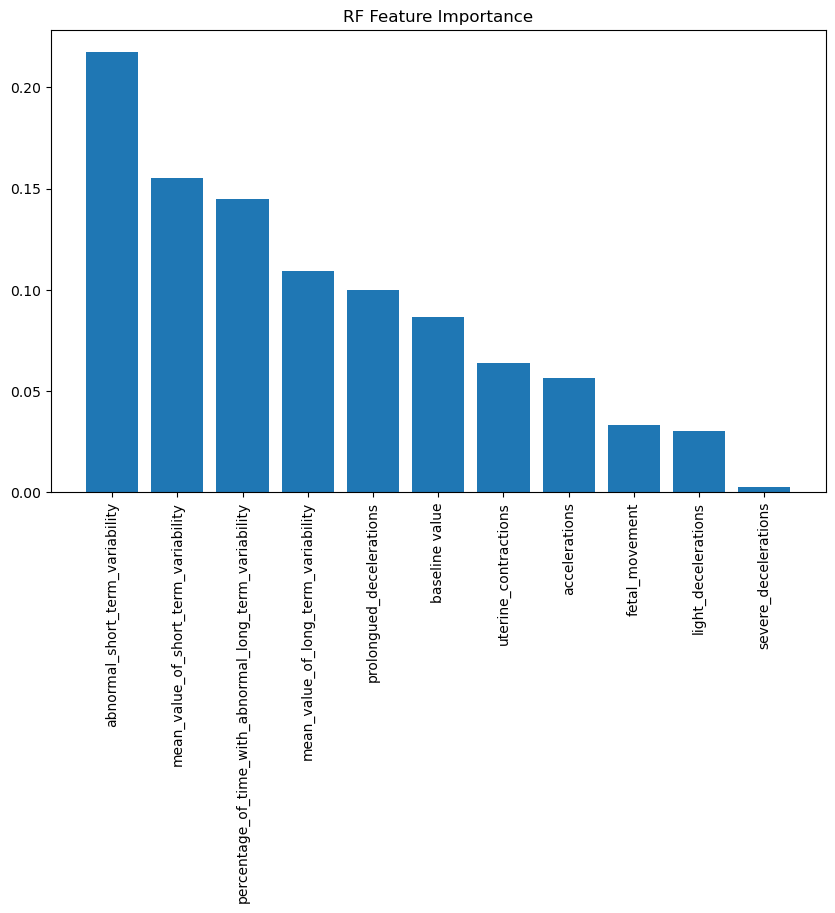

In [134]:
indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("RF Feature Importance")
plt.bar(range(X_train.shape[1]), rf_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

In [135]:
rf_acc = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9387464387464387


In [140]:
import pickle

# Assuming GBDT_model is your trained model
with open('Desktop/untitled folder/models/rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved successfully in the 'models' folder!")


Model saved successfully in the 'models' folder!


In [72]:
df_fetal.shape


(2126, 22)

In [77]:
file_path = 'maternal_health.csv'
df_maternal = pd.read_csv(file_path)

In [78]:
df_maternal.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [79]:
df_maternal.shape

(1014, 7)

In [81]:
feature_list = [x for x in df_maternal.columns]
feature_list.remove('RiskLevel')

In [83]:
y = df_maternal['RiskLevel']
X = df_maternal[feature_list]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1234)

In [85]:
ohe_RiskLevel = []
for risk in df_maternal['RiskLevel']:
    if 'high' in risk:
        ohe_RiskLevel.append(3)
    elif 'mid' in risk:
        ohe_RiskLevel.append(2)
    else:
        ohe_RiskLevel.append(1)
df_maternal['RiskLevel'] = ohe_RiskLevel

In [86]:
df_maternal['RiskLevel']

0       3
1       3
2       3
3       3
4       1
       ..
1009    3
1010    3
1011    3
1012    3
1013    2
Name: RiskLevel, Length: 1014, dtype: int64

In [87]:
GBDT_param_grid={"learning_rate": [.12, .13],
    "max_depth":[1],
    "subsample":[0.87],
    "n_estimators":range(150,200)}

In [88]:
GBDT_model = GradientBoostingClassifier()
rs = RandomizedSearchCV(GBDT_model, param_distributions=GBDT_param_grid,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=5, return_train_score=True)
rs.fit(X_train, y_train)
rs.best_params_

{'subsample': 0.87, 'n_estimators': 175, 'max_depth': 1, 'learning_rate': 0.13}

In [89]:
print('Running Grid Search...')

# 1. Create a GradientBoostingClassifier model object 

GBDT_model = GradientBoostingClassifier()


# 2. Run a grid search with 5-fold cross-validation 
GBDT_grid = GridSearchCV(GBDT_model, GBDT_param_grid, cv=5)


# 3. Fit the model on the training data
GBDT_grid_search = GBDT_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [90]:
GBDT_model = GradientBoostingClassifier(max_depth = 1,
n_estimators = 153, learning_rate = .12, subsample = .87)
GBDT_model.fit(X_train, y_train)
print('End')

End


In [91]:
y_GBDT_pred = GBDT_model.predict(X_test)

In [92]:
GBDT_importances = GBDT_model.feature_importances_

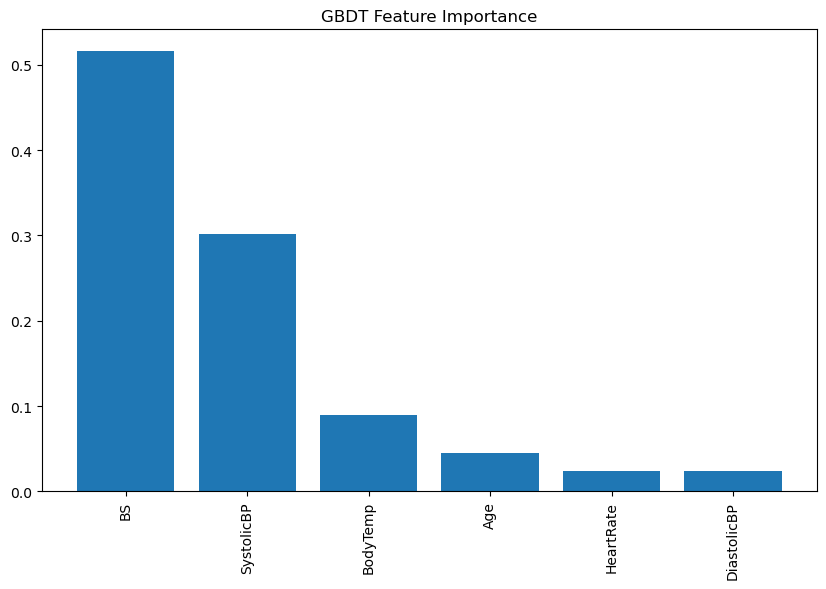

In [93]:
indices = np.argsort(GBDT_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("GBDT Feature Importance")
plt.bar(range(X_train.shape[1]), GBDT_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()
    

In [94]:
GBDT_acc = accuracy_score(y_test, y_GBDT_pred)


Gradient Boost Decision Trees Accuracy: 0.7373134328358208


In [95]:
import pickle

# Assuming you have a trained GBDT model called 'GBDT_model'
# Save the trained GBDT model to a .pkl file
with open('GBDT_model.pkl', 'wb') as file:
    pickle.dump(GBDT_model, file)

print("GBDT model saved successfully!")


GBDT model saved successfully!


In [142]:
import numpy as np
import pickle

# Load the saved GBDT model
try:
    with open('GBDT_model.pkl', 'rb') as file:
        GBDT_model_loaded = pickle.load(file)
    print("GBDT model loaded successfully!")

    # Example of correct input format (make sure this matches the training data format)
    # Replace this with your actual 21 features.
    sample_data = np.array([[25, 120, 80, 100, 36.5, 75]])  # Additional features

    # Make prediction using the loaded model
    prediction = GBDT_model_loaded.predict(sample_data)
    print(f"Prediction: {prediction}")

except Exception as e:
    print(f"Error loading GBDT model: {e}")


GBDT model loaded successfully!
Prediction: ['high risk']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [98]:
print("Current working directory:", os.getcwd())

Current working directory: /Users/alyssaking


In [103]:
import pickle

# Assuming GBDT_model is your trained model
with open('Desktop/untitled folder/models/GBDT_model.pkl', 'wb') as file:
    pickle.dump(GBDT_model, file)

print("Model saved successfully in the 'models' folder!")


Model saved successfully in the 'models' folder!


In [141]:
df_maternal.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3
1,35,140,90,13.0,98.0,70,3
2,29,90,70,8.0,100.0,80,3
3,30,140,85,7.0,98.0,70,3
4,35,120,60,6.1,98.0,76,1
